## Part 1: MAP

## 1. Generate 50 2D-data points using the following function: y = sin(x^2 + 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

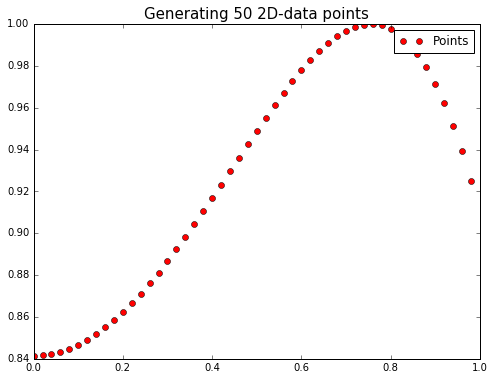

In [2]:
# Defining the function
def f(x):
    return (np.sin(x**2 + 1))

# Generating 50 data points
x = np.arange(0, 1, 0.02)
y = f(x)

#Setting up matplotlib
def setup_plot(title):
    %matplotlib inline
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title, fontsize=15)

# Plotting the data
def plot_data(x, y):
    setup_plot("Generating 50 2D-data points")
    plt.plot(x, y, "ro", label = "Points")
    plt.legend()
    plt.show()
    
plot_data(x, y)

## 2. Add Gaussian random noise to the data

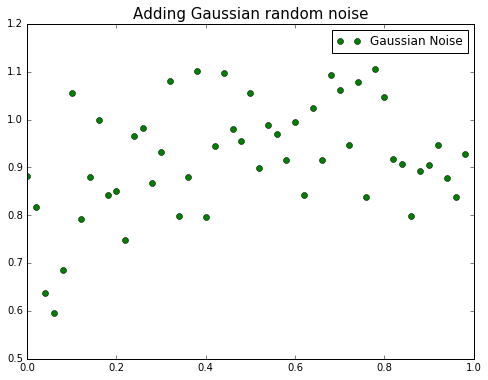

In [3]:
noise = np.random.normal(0, 0.1,50)
gauss_y = y + noise

# Plotting the data
def plot_data(x, y):
    setup_plot("Adding Gaussian random noise")
    plt.plot(x, y, "go", label = "Gaussian Noise")
    plt.legend()
    plt.show()
    
plot_data(x, gauss_y)

## 3. Show the original curve line and the noisy data.

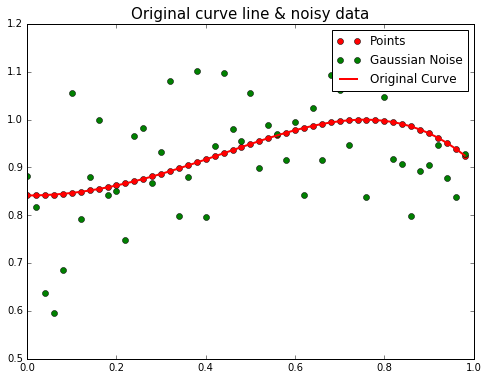

In [4]:
# Plotting the data
def plot_data(x, y, noisy):
    setup_plot("Original curve line & noisy data")
    plt.plot(x, y, "ro", label = "Points")
    plt.plot(x, noisy, "go", label = "Gaussian Noise")
    org_line = plt.plot(x,y, label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    plt.legend()
    plt.show()
plot_data(x, y, gauss_y)

## 4. Fit the generated noisy data using the MAP as discussed in class.

M=4, alpha=0.01


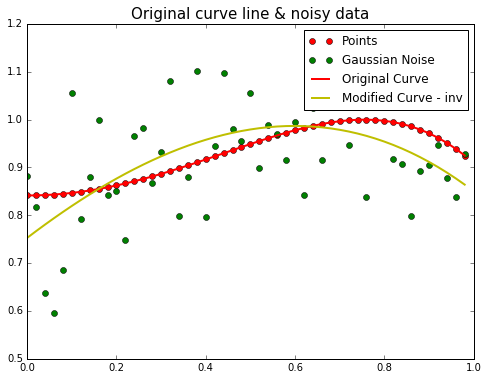

In [5]:
# Creating the matrix for M = 4, a.k.a polynomial of highest degree 4. 
def create_matrix(M, x):
    m = np.array([x**i for i in range(M)]).transpose()
    return m

# defining the inverse for the 
def normal_inv(noisy, matrix, alpha_beta = 0.01, M=10):
    b = np.array(noisy)                                    # points on the line
    xtx = np.dot(matrix.transpose(),matrix)
    ab_identity = np.array([[alpha_beta for i in range(M)] for j in range(M)])
    w = np.dot(np.dot(np.linalg.inv(xtx + ab_identity), matrix.T), b)
    return (w)

def generate_points(weight, x):
    z = 0
    for i in range(len(weight)):
        z += weight[i] * (x ** i)
    return (z)

# Plotting the data
def plot_data(x, y, noisy, y_estimate):
    setup_plot("Original curve line & noisy data")
    plt.plot(x, y, "ro", label = "Points")
    plt.plot(x, noisy, "go", label = "Gaussian Noise")
    org_line = plt.plot(x,y, label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    est_line = plt.plot(x, y_estimate, label = "Modified Curve - inv")
    plt.setp(est_line, color='y', linewidth = 2.0)
    plt.legend()
    plt.show()

def fit_data(n, alpha, x):
    m = create_matrix(n, x)
    w_inv = normal_inv(gauss_y, m, alpha, n)
    y_est = generate_points(w_inv, x)
    plot_data(x, y, gauss_y, y_est)
    return w_inv

print("M=4, alpha=0.01")
w_inv = fit_data(4, 0.01, x)

## 5. Compute and display the error value, E(w)

In [6]:
def E(w, x, y):
    z = 0
    for i in range(len(x)):
        z += (generate_points(w, x[i]) - y[i])**2
    return (0.5*z)

error = E(w_inv, x, y)
print("Error = %s" % error)

Error = 0.0399956001424


## 6. Display the estimated values of w

In [7]:
print("w_inv = %s " % w_inv)

w_inv = [ 0.75292093  0.7104066  -0.41587555 -0.1971334 ] 


## 7. Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values. Try to understand the cases where the regularization term helps reduce the overfitting problem generated by a large M.

M=4, alpha = 0.01


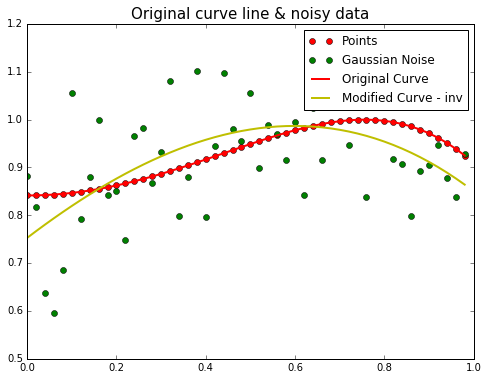

M=4, alpha = 0.2


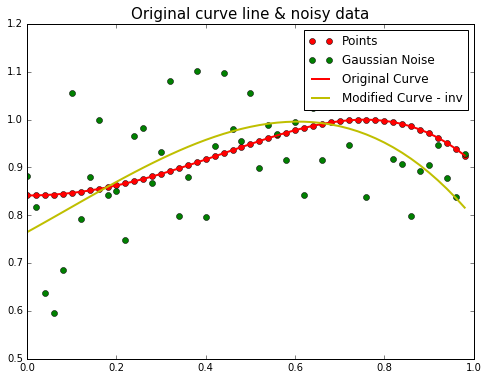

M=8, alpha = 0.01


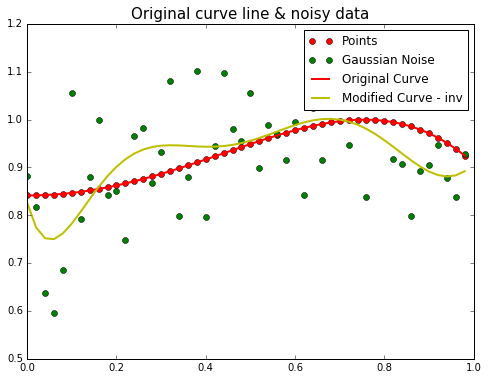

M=8, alpha = 0.5


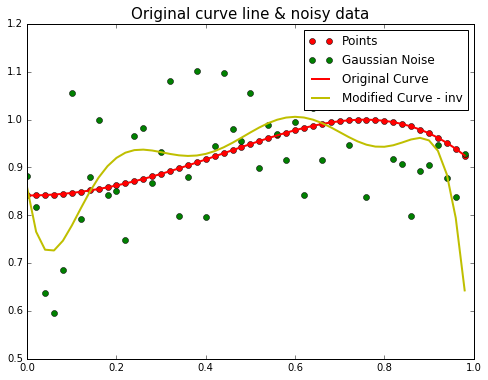

array([  8.57268990e-01,  -6.29593376e+00,   9.58499636e+01,
        -5.35037758e+02,   1.47429057e+03,  -2.14086518e+03,
         1.56872201e+03,  -4.57113488e+02])

In [8]:
print("M=4, alpha = 0.01")
fit_data(4, 0.01, x)
print("M=4, alpha = 0.2")
fit_data(4, 0.2, x)
print("M=8, alpha = 0.01")
fit_data(8, 0.01, x)
print("M=8, alpha = 0.5")
fit_data(8, 0.5, x)

# Part 2: Basis Functions

## 1. Generate 50 2D-data points using the following function: y = sin(x^2 + 1)

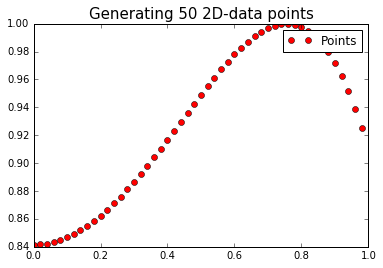

In [9]:
# Defining the function
def f(x):
    return (np.sin(x**2 + 1))

# Generating 50 data points
x = np.arange(0, 1, 0.02)
y = f(x)

#Setting up matplotlib
def setup_plot(title):
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title, fontsize=15)

# Plotting the data
def plot_data(x, y):
    setup_plot("Generating 50 2D-data points")
    plt.plot(x, y, "ro", label = "Points")
    plt.legend()
    plt.show()
    
plot_data(x, y)

# 2. Add Gaussian random noise to the data

In [10]:
noise = np.random.normal(0, 0.1, 50)
gauss_y = y + noise
#print(gauss_y)

# 3. Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.

In [11]:
import math

def gaussian_basis_function(x, mu, sigma):
    return math.exp(-((x - mu)**2)/(2*sigma**2))

M = 4


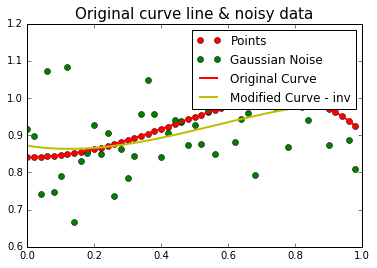

In [12]:
gbf_vectorize = np.vectorize(gaussian_basis_function)

def normal_inv(gauss_y, m):
    b = np.array(gauss_y)                            # points on the line
    mtm = np.linalg.inv(np.dot(m.transpose(),m))
    mplus = np.dot(mtm, m.transpose())
    return (np.dot(mplus, b))                       # calculating for the coefficients

# Plotting the data
def plot_data(x, y, noisy, y_estimate):
    setup_plot("Original curve line & noisy data")
    plt.plot(x, y, "ro", label = "Points")
    plt.plot(x, noisy, "go", label = "Gaussian Noise")
    org_line = plt.plot(x,y, label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    est_line = plt.plot(x, y_estimate, label = "Modified Curve - inv")
    plt.setp(est_line, color='y', linewidth = 2.0)
    plt.legend()
    plt.show()

def fit_data(n, alpha, x, bx):
    m = create_matrix(n, bx) # you can use np.zeroes!
    w_inv = normal_inv(gauss_y, m)
    y_est = generate_points(w_inv, x)
    plot_data(x, y, gauss_y, y_est)

def m_values(M):
    print("M = %d" % M)
    fit_data(M, 0.01, x, gbf_vectorize(x, 1, 0.45))
    
m_values(4)

## 4. Show your results for different values of M that generate overfitting and underfitting curves.

M = 1


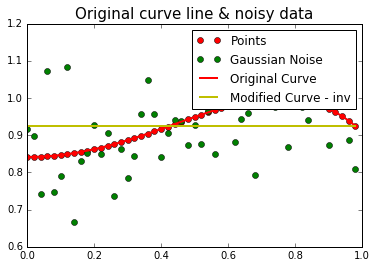

M = 2


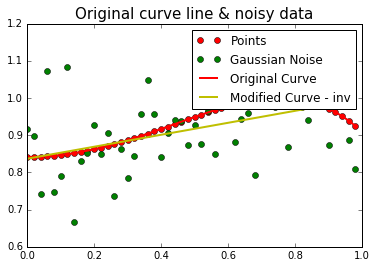

M = 3


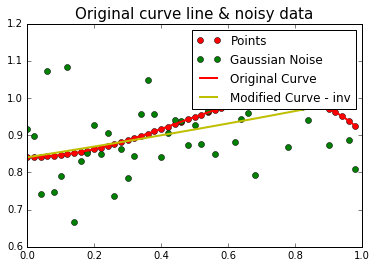

M = 4


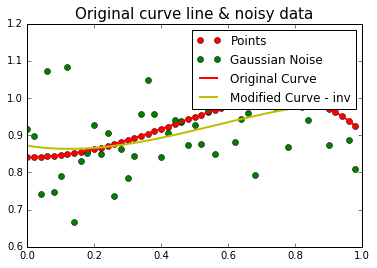

M = 5


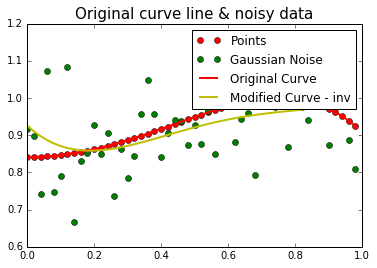

M = 6


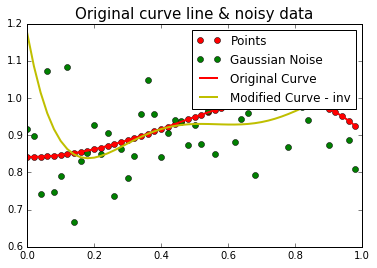

M = 7


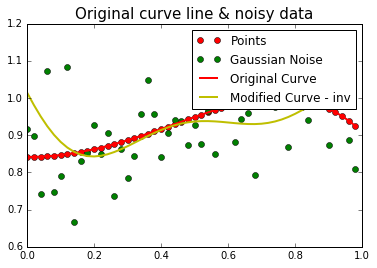

M = 8


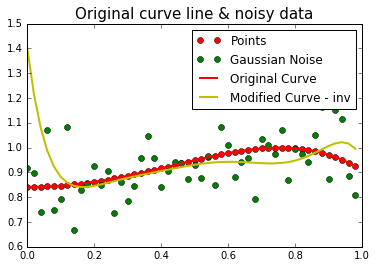

M = 9


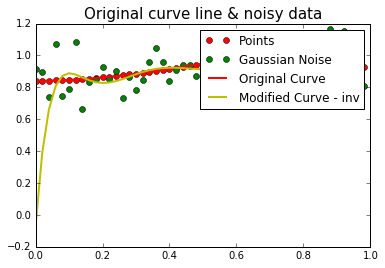

M = 10


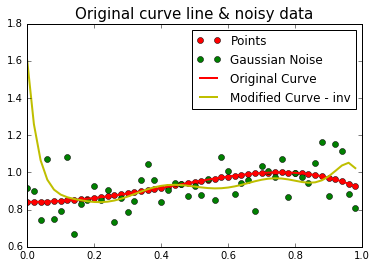

In [13]:
def m_values(M):
    print("M = %d" % M)
    fit_data(M, 0.01, x, gbf_vectorize(x, 1, 0.45))
    
for i in range(10):
    m_values(i+1)

## 5. Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.

M = 1


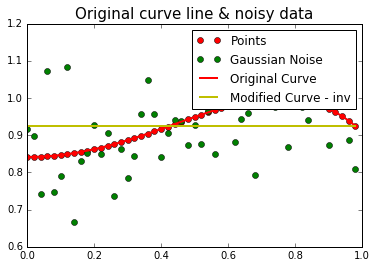

M = 2


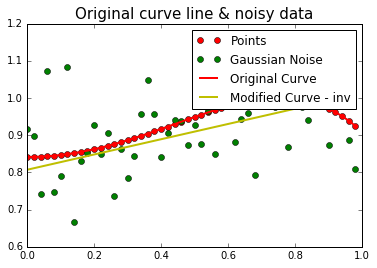

M = 3


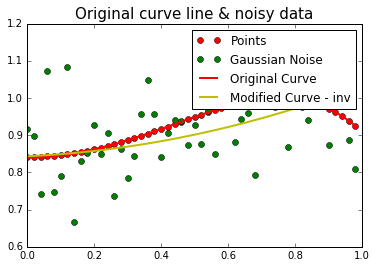

M = 4


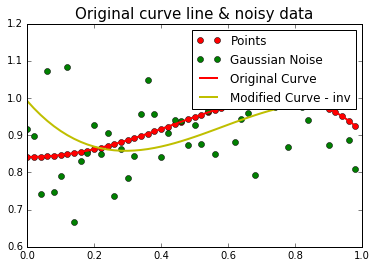

M = 5


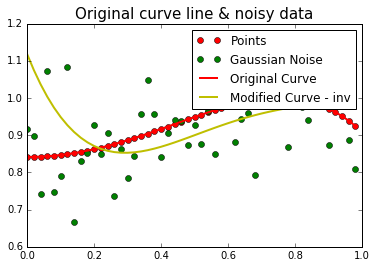

M = 6


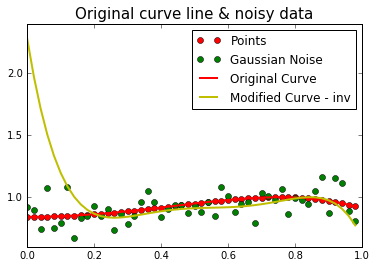

M = 7


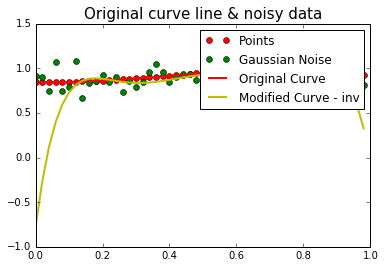

M = 8


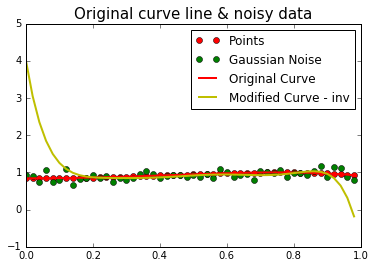

M = 9


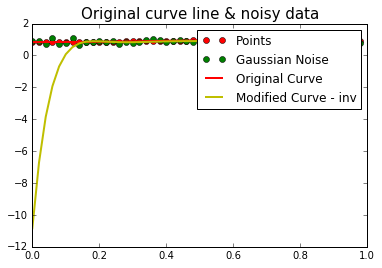

M = 10


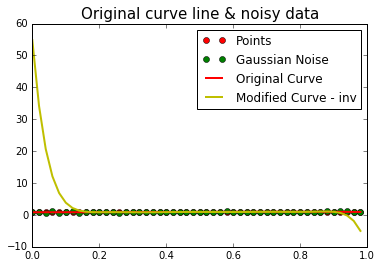

In [14]:
def logistic_sigmoid(a):
    return (1 / (1 + np.exp(-a)))

def sigmoid_basis_function(x, mu, sigma):
    a = (x - mu) / sigma
    return logistic_sigmoid(a)

sbf_vectorize = np.vectorize(sigmoid_basis_function)

def m_values(M):
    print("M = %d" % M)
    fit_data(M, 0.01, x, sbf_vectorize(x, 0.4, 0.25))
    
for i in range(10):
    m_values(i+1)

## 6. Change the original curve function to y = 0.4345x^3 - 5.607x^2 + 16.78x - 10.61, and use the sigmoid basis function to estimate the best curve fitting from the noisy data.

M = 3
[-106.23092657  266.80359291 -168.52346777]


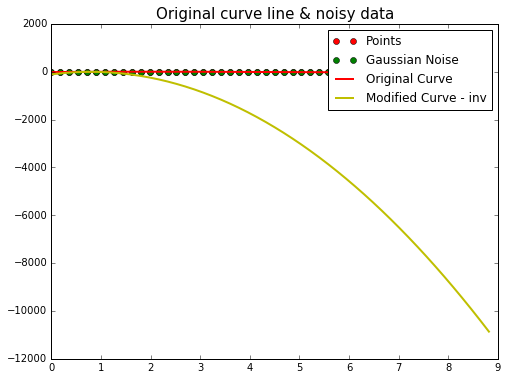

In [15]:
def f(x):
    return (0.4345*x**3 - 5.607*x**2 + 16.78*x - 10.61)

x = np.arange(0, 9, 0.18)
y = f(x)

def setup_plot(title):
    %matplotlib inline
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title, fontsize=15)

noise = np.random.normal(0, 5,50)
gauss_y = y + noise

def normal_inv(gauss_y, m):
    b = np.array(gauss_y)                            # points on the line
    mtm = np.linalg.inv(np.dot(m.transpose(),m))
    mplus = np.dot(mtm, m.transpose())
    return (np.dot(mplus, b))                       # calculating for the coefficients

# Plotting the data
def plot_data(x, y, noisy, y_estimate):
    setup_plot("Original curve line & noisy data")
    plt.plot(x, y, "ro", label = "Points")
    plt.plot(x, noisy, "go", label = "Gaussian Noise")
    org_line = plt.plot(x,y, label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    est_line = plt.plot(x, y_estimate, label = "Modified Curve - inv")
    plt.setp(est_line, color='y', linewidth = 2.0)
    plt.legend()
    plt.show()

def fit_data(n, alpha, x, bx):
    m = create_matrix(n, bx)
    w_inv = normal_inv(gauss_y, m)
    print(w_inv)
    y_est = generate_points(w_inv, x)
    plot_data(x, y, gauss_y, y_est)

def m_values(M):
    print("M = %d" % M)
    fit_data(M, 0.15, x, sbf_vectorize(x, 0.01, 0.30))
    
m_values(3)
